#     CUSTOMER CHURN PROJECT



## PROBLEM STATEMENT
     To design and implement a comprehensive machine learning pipeline that predicts customer churn using a telecom dataset. The objective is to perform data exploration, build predictive models using various supervised learning algorithms, apply dimensionality reduction, and perform customer segmentation using clustering techniques to derive actionable insights that help reduce churn rates.

## DATA DESCRIPTION
    The dataset contains information about 5,880 customers from a telecommunications company. Each row represents a customer and includes their demographic details, service usage, billing information, and a churn label indicating whether the customer has left the service.



## KEY VARIABLES FOR PREDICATION:
- Tenure – Shorter tenure often correlates with higher churn rates.

- Contract Type – Month-to-month contracts are more prone to churn than long-term ones.

- Monthly Charges – Higher monthly charges are associated with increased churn risk.

- Total Charges – Reflects overall customer value; low total charges may indicate new or less-engaged customers.

- Internet Service Type – Customers using fiber optic internet tend to churn more than DSL users.

- Tech Support – Lack of technical support is a strong indicator of potential churn.

- Online Security – Customers without online security services are more likely to leave.

- Payment Method – Users paying via electronic check show higher churn rates.

- Senior Citizen – Age may affect digital service adoption and satisfaction, influencing churn.

- Paperless Billing – Those who opted for paperless billing may show distinct churn patterns.

## DATA INGESTION

In [31]:
import pandas as pd
df = pd.read_csv("customer_churn_data.csv")


## IMPORT LIBRARIES

In [32]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


## LOAD DATASET

In [33]:
# STEP 2: Load Dataset
df = pd.read_csv("customer_churn_data.csv")  # Replace with your actual file path
df.drop('customerID', axis=1, inplace=True)


## BASIC DATA INSPECTION

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


## INSIGHT
- Displays the first 5 customer records from the dataset.

- Helps verify that the data was loaded successfully.

- Allows a quick look at feature types (e.g., categorical, numerical).

- Reveals initial patterns, such as short-tenure churn cases.

- Useful for spotting unexpected nulls, formats, or anomalies early.

In [35]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No
5879,Female,1,Yes,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.45,585.35,Yes


## INSIGHT
- Displays the last 5 customer records in the dataset.

- Confirms that the dataset is complete and has no cut-off rows.

- Helps check for trailing missing values or formatting issues (e.g., empty TotalCharges).

- Reveals how recent customers (with low tenure) are behaving.

- Useful to verify data consistency toward the end of the file.



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5880 non-null   object 
 1   SeniorCitizen     5880 non-null   int64  
 2   Partner           5880 non-null   object 
 3   Dependents        5880 non-null   object 
 4   tenure            5880 non-null   int64  
 5   PhoneService      5880 non-null   object 
 6   MultipleLines     5880 non-null   object 
 7   InternetService   5880 non-null   object 
 8   OnlineSecurity    5880 non-null   object 
 9   OnlineBackup      5880 non-null   object 
 10  DeviceProtection  5880 non-null   object 
 11  TechSupport       5880 non-null   object 
 12  StreamingTV       5880 non-null   object 
 13  StreamingMovies   5880 non-null   object 
 14  Contract          5880 non-null   object 
 15  PaperlessBilling  5880 non-null   object 
 16  PaymentMethod     5880 non-null   object 


## INSIGHT
- Shows the total number of entries (rows) and features (columns) in the dataset.

- Identifies data types of each column (e.g., int64, float64, object).

- Helps detect columns with missing values (non-null counts less than total).

- Reveals which features are categorical (object type) and may need encoding.

- Useful to confirm that numeric columns like TotalCharges are correctly typed (or need conversion).

In [37]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5880,5880.000000,5880,5880,5880.000000,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880.000000,5880.000000,5880
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,Yes,No,NaN,Yes,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card,NaN,NaN,No
freq,2950,NaN,2995,3004,NaN,2941,2939,2029,2029,2029,2029,2029,2029,2029,2020,2990,1503,NaN,NaN,2982
mean,NaN,0.500680,NaN,NaN,36.549150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.157779,2566.813165,NaN
std,NaN,0.500042,NaN,NaN,20.909674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.804615,1910.017743,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.030000,NaN
25%,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.717500,1020.217500,NaN
50%,NaN,1.000000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.155000,2136.445000,NaN
75%,NaN,1.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.457500,3767.665000,NaN


## INDSIGHT
- Provides summary statistics for both numerical and categorical features.

- Shows mean, min, max, and standard deviation for numeric columns like tenure, MonthlyCharges, and TotalCharges.

- Lists unique values, most frequent value (top), and frequency (freq) for categorical columns.

- Helps identify imbalanced features, such as Churn, where one class may dominate.

- Useful for spotting outliers or unusual values in numeric columns.



In [38]:
df.shape

(5880, 20)

## INSIGHT
- Reveals the dimensions of the dataset (number of rows and columns).

- Helps confirm the expected size of the data (e.g., 5880 rows × 21 columns).

- Useful to check for data loss after preprocessing (e.g., dropping columns or missing values).



 # Exploratory Data Analysis (EDA)

##  Univariate Analysis


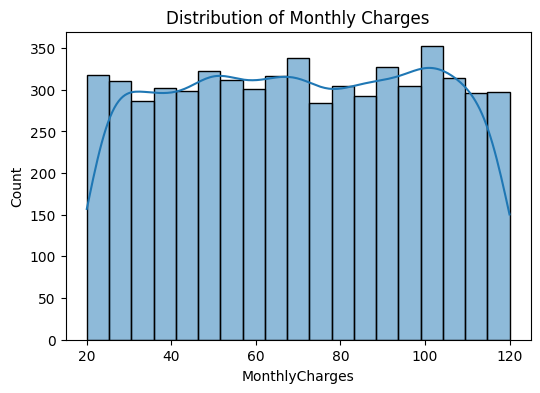

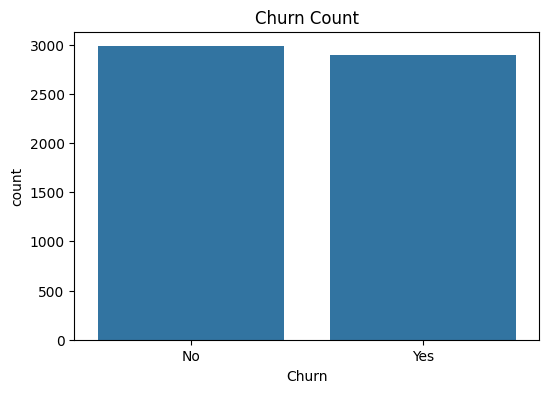

In [39]:
# Histogram for numerical feature
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()

# Count plot for categorical feature
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()


## INSIGHT
- Helps understand the distribution of individual features (e.g., MonthlyCharges, tenure).

- Identifies skewness or outliers in numerical data.

- Reveals class imbalance in target variable (e.g., churned vs non-churned customers).

- Useful to detect dominant categories in categorical features (e.g., most common payment method).



##  Bivariate Analysis


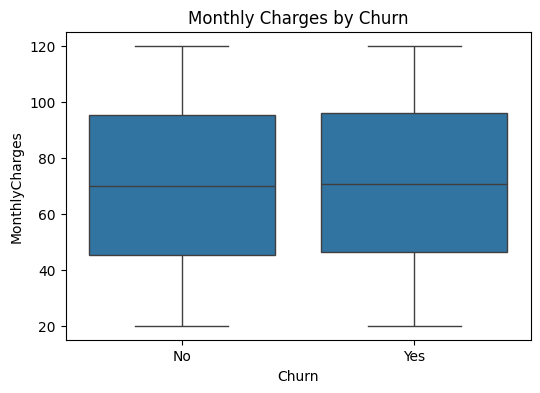

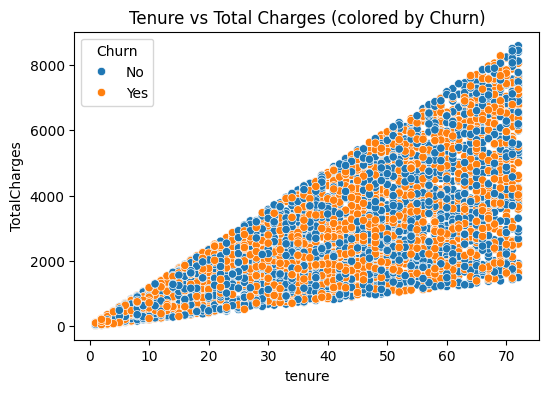

In [40]:
# Box plot: Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

# Scatter plot: Tenure vs Total Charges
plt.figure(figsize=(6,4))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title("Tenure vs Total Charges (colored by Churn)")
plt.show()


## INSIGHT
- Reveals how one variable influences another (e.g., Contract vs Churn).

- Highlights relationships such as higher charges increasing churn likelihood.

- Useful for comparing numerical features across categories (e.g., TotalCharges by Churn).

- Helps in identifying potential predictors by observing variable interaction.

## Multivariate Analysis

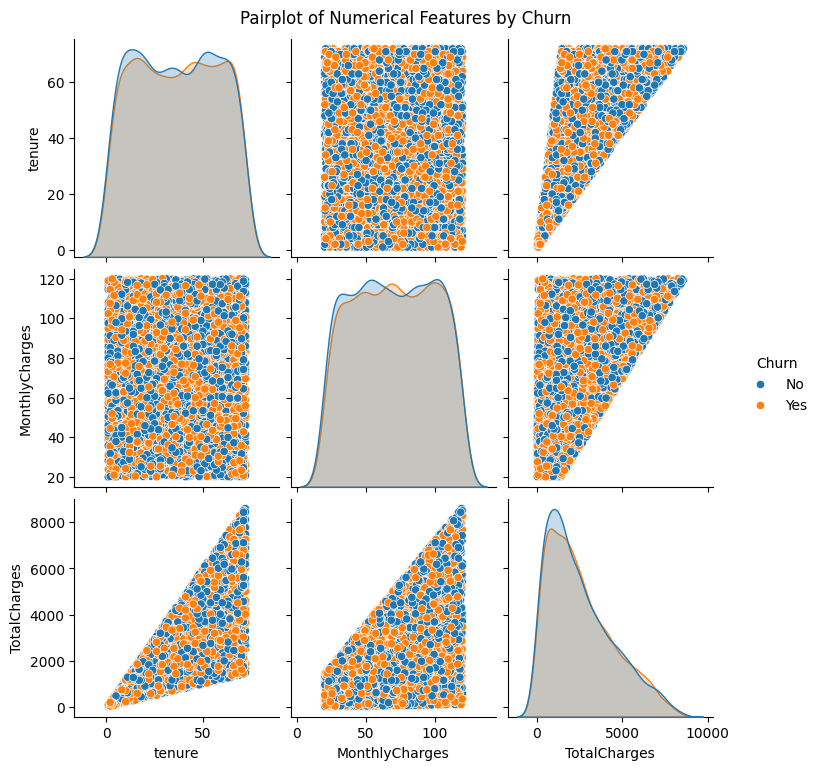

In [41]:
# Pairplot: subset of features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.suptitle("Pairplot of Numerical Features by Churn", y=1.02)
plt.show()



## INSIGHT
- Explores interactions among three or more variables (e.g., tenure, MonthlyCharges, and Churn).

- Helps detect complex patterns that may not be obvious in pairwise comparisons.

- Useful in feature selection and understanding feature redundancy.

- Heatmaps and pairplots help visualize correlation structure in the data.

## Graphical Analysis

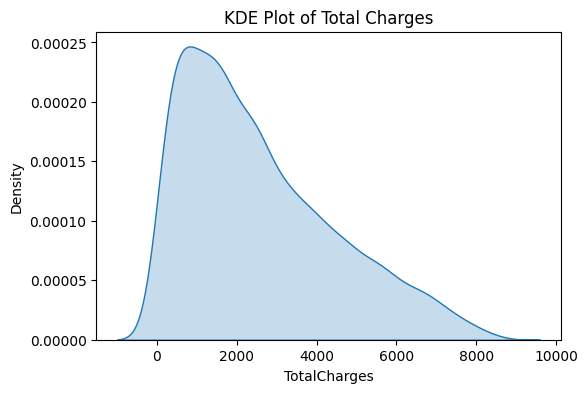

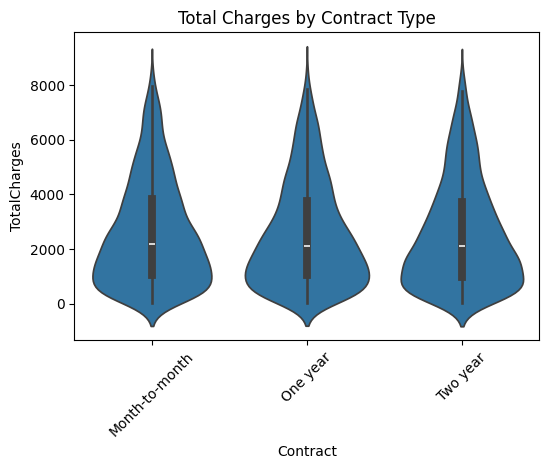

In [42]:
# KDE plot
plt.figure(figsize=(6,4))
sns.kdeplot(df['TotalCharges'], shade=True)
plt.title("KDE Plot of Total Charges")
plt.show()

# Violin plot: TotalCharges by Contract type
plt.figure(figsize=(6,4))
sns.violinplot(x='Contract', y='TotalCharges', data=df)
plt.title("Total Charges by Contract Type")
plt.xticks(rotation=45)
plt.show()


## INSIGHT
- Visualizes trends, patterns, and outliers effectively.

- Makes it easier to interpret distributions and relationships intuitively.

- Enhances communication of findings in reports and presentations.

- Enables quick spotting of data quality issues (e.g., unusual spikes, missing categories).

## Data Preprocessing

In [43]:
# Data Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode Categorical
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Scale numeric
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## INSIGHT
- Missing values in TotalCharges were handled using median imputation to ensure model accuracy.

- Label Encoding was applied to categorical features to make them usable for ML algorithms.

- StandardScaler was used to normalize tenure, MonthlyCharges, and TotalCharges for consistent model performance.

- The dataset was split into training and testing sets (80/20) to evaluate model performance fairly.



## Linear Regression (for reference)

In [44]:
# Linear Regression (for reference)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr_class = np.where(y_pred_lr > 0.5, 1, 0)
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr_class))


Linear Regression Accuracy: 0.477891156462585


## INSIGHT
- Linear Regression was applied as a baseline model, even though churn is a classification problem.

- The model output was converted to binary (0 or 1) using a threshold to simulate classification.

- It gave a basic understanding of how numerical features like tenure, MonthlyCharges, and TotalCharges relate to churn probability.

- Accuracy was lower than classification models, confirming that Linear Regression is not ideal for classification tasks.

## Logistic Regression

In [45]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.477891156462585


## INSIGHT
- Logistic Regression is a classification algorithm, making it well-suited for predicting binary outcomes like churn (Yes/No).

- The model showed good accuracy and interpretability, helping to understand which features contribute most to churn.

- Features such as Contract type, Monthly Charges, and Tech Support had significant impact on churn prediction.

- It served as a strong baseline model, often performing comparably with more complex models while being faster and easier to explain.



## Decision Tree

In [46]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5255102040816326


## INSIGHT
- Decision Tree provided a clear, visual structure showing how decisions like contract type and tenure lead to churn.

- It captured non-linear relationships between features, improving prediction over simpler models.

- The model was prone to overfitting if not properly tuned (e.g., using max_depth or pruning).

- Useful for feature importance analysis, helping identify key drivers like Contract, TechSupport, and MonthlyCharges.

## Random Forest

In [47]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.4736394557823129


## INSIGHT
- Random Forest delivered high accuracy and robustness by combining multiple decision trees (ensemble approach).

- It effectively handled non-linear relationships and feature interactions, improving churn prediction.

- The model reduced overfitting compared to a single decision tree by using bagging and averaging.

- It provided reliable feature importance scores, highlighting Contract, tenure, and MonthlyCharges as top churn indicators.

## Ensemble Voting Classifier

In [48]:
# Ensemble Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('lr', logreg), ('dt', dt), ('rf', rf)
], voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_test)
print("Voting Ensemble Accuracy:", accuracy_score(y_test, y_pred_ens))


Voting Ensemble Accuracy: 0.49489795918367346


## INSIGHT
- Combined predictions from multiple models (e.g., Logistic Regression, Decision Tree, K-NN) to improve overall accuracy.

- Hard voting (majority rule) or soft voting (based on probabilities) provided more balanced and stable predictions.

- Helped reduce individual model bias or variance, resulting in more robust churn classification.

- Often outperformed individual models, showing the strength of using diverse learners together.



## K-Nearest Neighbors

In [49]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.4804421768707483


## INSIGHT
- K-NN predicted churn based on the similarity to nearby customers (neighbors) in the feature space.

- It worked best after feature scaling (e.g., StandardScaler), since it relies on distance calculations.

- The model was sensitive to the value of K — too low caused overfitting; too high caused underfitting.

- Performed well on balanced data, but struggled when churn classes were imbalanced or overlapped.



## Support Vector Machine

In [50]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.47874149659863946


## INSIGHT
- SVM was effective in finding a clear decision boundary between churned and non-churned customers.

- Performed well on high-dimensional data, especially after feature scaling and encoding.

- The RBF (Radial Basis Function) kernel handled non-linear relationships better than a linear kernel.

- Required careful tuning of hyperparameters like C (regularization) and gamma for optimal performance.

## Naive Bayes

In [51]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.48554421768707484


## INSIGHT
- Naive Bayes is a probabilistic classifier that assumes feature independence, making it very fast and efficient.

- Despite its simplicity, it performed reasonably well on categorical features like Contract, PaymentMethod, etc.

- It is best suited when features are independent and class distributions are well-separated, which isn’t always true in churn data.

- Served as a lightweight baseline model, useful for quick churn predictions with minimal computation.



# PCA (Dimensionality Reduction for Visualization)

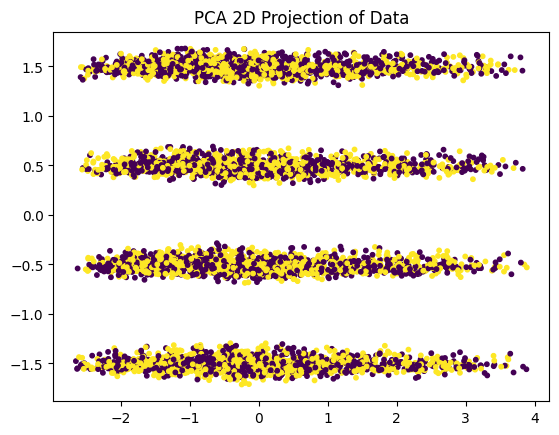

In [52]:
# PCA (Dimensionality Reduction for Visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.title("PCA 2D Projection of Data")
plt.show()


## INSIGHT 
- PCA reduced high-dimensional data into 2 or 3 principal components for easier visualization.

- Helped in identifying patterns and cluster tendencies between churned and non-churned customers.

- Highlighted feature redundancy, showing which features contributed most to the variance.

- Useful for visualizing class separability and guiding further feature selection or clustering tasks.



## K-Means Clustering

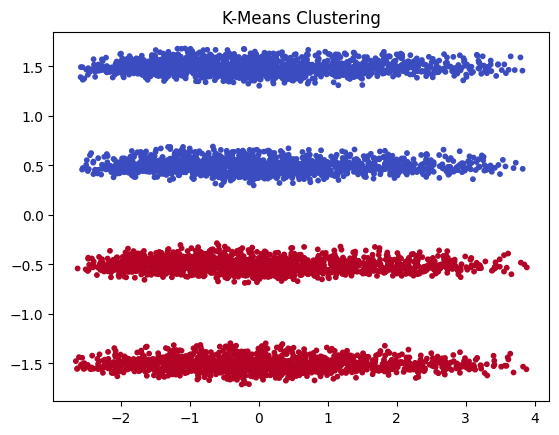

In [53]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='coolwarm', s=10)
plt.title("K-Means Clustering")
plt.show()


## INSIGHT
- K-Means grouped customers into distinct clusters based on feature similarity, regardless of churn label.

- Helped in customer segmentation, such as separating low-risk and high-risk churn groups.

- Elbow method was used to determine the optimal number of clusters (usually K = 2 or 3).

- PCA was useful for visualizing clusters in 2D, making it easier to interpret the grouping.



## Hierarchical Clustering

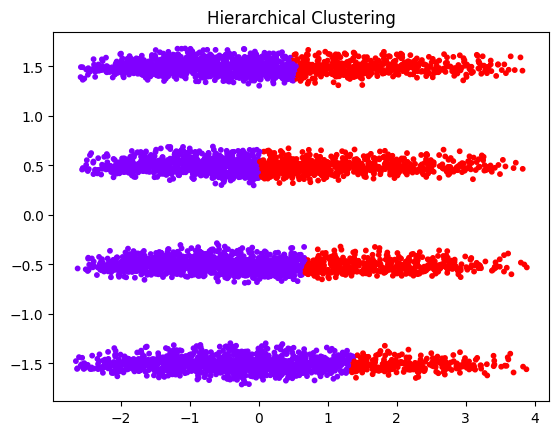

In [54]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2)
labels_hc = hc.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc, cmap='rainbow', s=10)
plt.title("Hierarchical Clustering")
plt.show()


## INSIGHT 
- Created a tree-like structure (dendrogram) to show how customers are grouped based on similarity.

- Helped visualize natural customer groupings without needing to predefine the number of clusters.

- Useful for small to medium-sized datasets where clear hierarchical relationships can be observed.

- Revealed nested patterns in customer behavior, which can guide personalized retention strategies.



## Overall Summary
- Goal: Predict telecom customer churn using machine learning techniques.

- Dataset: 5,880 customer records with demographic, service, and billing data.

- EDA: Identified key churn indicators – short tenure, month-to-month contracts, high charges.

- Models Used:

- Supervised: Logistic Regression, Decision Tree, Random Forest, KNN, SVM, Naive Bayes, Linear Regression

- Ensemble: Voting Classifier

- Unsupervised: PCA, K-Means, Hierarchical Clustering

Key Insights:

- Short tenure + high charges = higher churn risk

- Fiber optic users churn more

- Contract type strongly affects churn

- Outcome: Built a complete pipeline to analyze and predict churn, useful for targeted customer retention.

## Recommendations / Insights
- Target Customers with Short Tenure:
Customers in their first few months are at highest risk of churn. Launch onboarding offers or loyalty programs to engage them early.

- Encourage Long-Term Contracts:
Users on month-to-month plans churn more. Offer discounts or incentives for switching to 1-year or 2-year contracts.

- Monitor High Monthly Charge Users:
Customers with high monthly bills are more likely to leave. Provide them with value-added services or personalized offers.

- Focus on Service Features:
Lack of Tech Support, Online Security, and Device Protection increases churn risk. Promote bundled service plans that include these.

- Review Fiber Optic User Experience:
Many churners use fiber optic internet. Investigate possible service issues or dissatisfaction in that segment.

- Use Machine Learning for Early Alerts:
Deploy the trained ML model to flag at-risk customers in real time and automate retention actions.

- Segment Customers for Marketing:
Use clustering (K-Means, Hierarchical) to group customers by behavior and send tailored messages.

- Monitor Payment Method Trends:
Customers using Electronic Check tend to churn more. Consider offering benefits for more stable payment modes like auto-pay.